In [1]:
from wordle_sim import simulate
import pandas as pd
import numpy as np

In [2]:
def apply_simulation(row):
    return np.asarray(simulate(), dtype=object)

In [3]:
num_simulations = 500
simulations = pd.DataFrame(index=range(num_simulations))
simulations['num_sim'] = range(num_simulations)
simulations[['correct_word', 'guesses', 'round', 'won', 'letterbanks', 'keyboards', 'colors']] = (
    simulations['num_sim'].apply(apply_simulation).to_list()
)

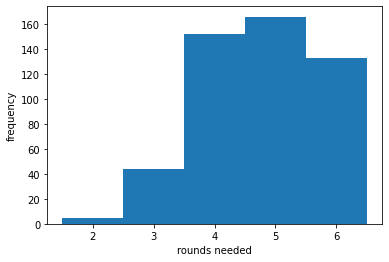

In [4]:
import matplotlib.pyplot as plt
plt.hist(simulations['round'], bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.xlabel('rounds needed')
plt.ylabel('frequency')
plt.show()

In [5]:
simulations.groupby('round').agg(count=('num_sim', 'count'))

,count
round,
2,5
3,44
4,152
5,166
6,133


In [6]:
simulations.groupby('won').agg(count=('num_sim', 'count'))

,count
won,
False,40
True,460


In [7]:
user_input_simulation = simulate('angus', 'trump')

In [8]:
user_input_simulation

('angus',
 ['trump', 'cusec', 'ushak', 'favus', 'alnus', 'anous'],
 6,
 False,
 [[['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',
    'y',
    'z'],
   ['a',
    'b',
    'c',
    'd',
    'e',
    'f',
    'g',
    'h',
    'i',
    'j',
    'k',
    'l',
    'm',
    'n',
    'o',
    'p',
    'q',
    'r',
    's',
    't',
    'u',
    'v',
    'w',
    'x',


In [9]:
def get_letters_per_round(letterbanks):
    letters_per_round = {}
    round_ = 1 
    for letterbank in letterbanks:
        set_for_round = set()
        lengths = 0
        for position, letters_for_position in enumerate(letterbank):
            letters_per_round[f'letter_{position}_round_{round_}'] = len(letters_for_position)
            set_for_round.update(set(letters_for_position))
            lengths += len(letters_for_position)
        letters_per_round[f'avg_round_{round_}'] = lengths/5
        letters_per_round[f'set_round_{round_}'] = set_for_round
        letters_per_round[f'set_length_round_{round_}'] = len(set_for_round)
        round_ += 1
    return letters_per_round

In [10]:
letters_per_round = simulations['letterbanks'].apply(get_letters_per_round).apply(pd.Series).fillna(0)
letters_per_round.columns = (
    letters_per_round.columns.map(lambda str_: tuple(str_.split('_round_')))
                     .set_names(['metric', 'round'])
)

In [11]:
metrics = (
    pd.DataFrame(letters_per_round.mean(numeric_only=True))
    .reset_index('metric')
    .pivot(columns='metric', values=0)
)

In [12]:
metrics

metric,avg,letter_0,letter_1,letter_2,letter_3,letter_4,set_length
round,,,,,,,
1,26.0000,26.000,26.000,26.000,26.000,26.000,26.000
2,20.7468,20.990,19.922,21.116,21.466,20.240,22.594
3,15.7500,16.410,15.314,15.738,16.468,14.820,19.904
4,9.8520,11.430,8.756,9.492,9.880,9.702,16.712
5,4.6368,6.056,3.444,4.484,4.846,4.354,11.156
6,1.7108,2.502,1.256,1.616,1.640,1.540,5.428
7,0.5380,0.838,0.388,0.554,0.444,0.466,1.952


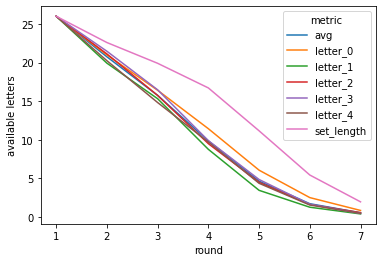

In [13]:
metrics.plot(ylabel='available letters')
plt.show()

## Color Distribution on keyboards

In [14]:
def list_of_chars_for_color(keyboard, given_color):
    return [char for char, color in keyboard.items() if color == given_color]

def get_colors_of_letters_per_round(keyboards):
    colors_of_letters_per_round = {}
    round_ = 1
    for keyboard in keyboards:
        colors = ['white', 'grey', 'yellow', 'green']
        for color in colors:
            colors_of_letters_per_round[f'{color}_round_{round_}'] = len(list_of_chars_for_color(keyboard, color))
        round_ += 1
    return colors_of_letters_per_round

In [15]:
colors_of_letters_per_round = (
    simulations['keyboards'].apply(get_colors_of_letters_per_round).apply(pd.Series, dtype=float)
    .dropna()
)

colors_of_letters_per_round.columns = (
    colors_of_letters_per_round.columns.map(lambda str_: tuple(str_.split('_round_')))
                     .set_names(['color', 'round'])
)

In [16]:
colors = (
    pd.DataFrame(colors_of_letters_per_round.mean(numeric_only=True))
    .reset_index('color')
    .pivot(columns='color', values=0)
)

In [17]:
colors

color,green,grey,white,yellow
round,,,,
1,0.000000,0.000000,26.000000,0.000000
2,0.308271,3.639098,21.496241,0.556391
3,0.759398,6.451128,17.984962,0.804511
4,1.571429,8.661654,15.165414,0.601504
5,2.255639,10.345865,13.030075,0.368421
6,2.969925,11.526316,11.300752,0.203008
7,4.082707,11.714286,10.142857,0.060150


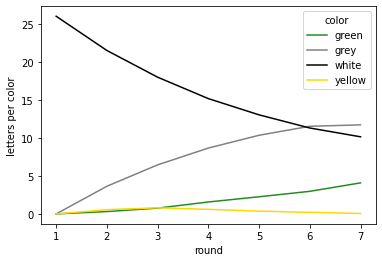

In [18]:
colors.plot(style=['forestgreen', 'gray', 'black', 'gold'], ylabel='letters per color')
plt.show()

## Color Distribution in Responses

In [19]:
def get_distribution_of_colors_in_responses(colors):
    colors_of_letters_per_round = {}
    round_ = 1
    for colors_in_round in colors:
        colors = ['grey', 'yellow', 'green']
        for color in colors:
            colors_of_letters_per_round[f'{color}_round_{round_}'] = colors_in_round.count(color)
        round_ += 1
    return colors_of_letters_per_round

In [20]:
colors_in_responses_per_round = (
    simulations['colors'].apply(get_distribution_of_colors_in_responses).apply(pd.Series, dtype=float)
    .dropna()
)

colors_in_responses_per_round.columns = (
    colors_in_responses_per_round.columns.map(lambda str_: tuple(str_.split('_round_')))
                     .set_names(['color', 'round'])
)

In [21]:
colors_in_responses_per_round = (
    pd.DataFrame(colors_in_responses_per_round.mean(numeric_only=True))
    .reset_index('color')
    .pivot(columns='color', values=0)
)

In [22]:
colors_in_responses_per_round

color,green,grey,yellow
round,,,
1,0.368421,4.000000,0.631579
2,0.804511,3.308271,0.887218
3,1.729323,2.563910,0.706767
4,2.481203,2.142857,0.375940
5,3.248120,1.533835,0.218045
6,4.526316,0.413534,0.060150


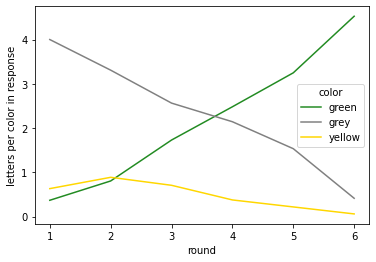

In [23]:
colors_in_responses_per_round.plot(style=['forestgreen', 'gray', 'gold'], ylabel='letters per color in response')
plt.show()